In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from random import random
%matplotlib inline

In [2]:
df = pd.read_csv('imdb_dataset.csv')
df.head()

,imdb_title_id,title,year,genre,duration,country,avg_vote,votes,budget,metascore,reviews_from_users,reviews_from_critics
0,tt0002101,Cleopatra,1912,"Drama, History",100,USA,5.2,446,45000.0,NaN,25.0,3.0
1,tt0002199,"From the Manger to the Cross; or, Jesus of Naz...",1912,"Biography, Drama",60,USA,5.7,484,NaN,NaN,13.0,5.0
2,tt0002461,Richard III,1912,Drama,55,"France, USA",5.5,225,30000.0,NaN,8.0,1.0
3,tt0003167,Amore di madre,1914,Drama,55,USA,5.8,187,NaN,NaN,6.0,NaN
4,tt0003419,Lo studente di Praga,1913,"Drama, Fantasy, Horror",85,Germany,6.5,1768,NaN,NaN,20.0,26.0


## Version with one column

In [3]:
df1 = df[['avg_vote','metascore']]
df1 = df1.dropna()
df1

,avg_vote,metascore
46,7.8,99.0
309,6.5,66.0
348,8.1,90.0
400,7.0,69.0
458,7.1,89.0
...,...,...
47426,5.2,44.0
47427,5.7,68.0
47439,5.8,68.0
47441,6.1,72.0


In [4]:
X = df1['metascore']
y = df1['avg_vote']

## Normalizing our variables

In [5]:
X = np.array((X-X.mean())/X.std())
X

array([ 2.51970144,  0.66105393,  2.01279757, ...,  0.77369923,
        0.99898984, -1.08494828])

In [6]:
y = np.array((y-y.mean())/y.std())
y

array([ 1.56670793,  0.2381542 ,  1.87329725, ..., -0.47722088,
       -0.17063156, -1.19259596])

## To implement a gradient descent algorithm we need to follow 4 steps:
    Randomly initialize the bias and the weight theta
    Calculate predicted value of y that is Y given the bias and the weight
    Calculate the cost function from predicted and actual values of Y
    Calculate gradient and the weights

## a. Randomly initialize the bias and the weight theta

In [7]:
def initialize(x):
    b=random()
    theta=np.random.rand()
    return b,theta
b,theta=initialize(1)
print('Bias:',b,'Weight:',theta)

Bias: 0.780344917671637 Weight: 0.9141830476370909


## b. Calculate predicted value of y that is Y given the bias and the weight

In [8]:
def preds(b,theta,X):
    return b + np.dot(X,theta)

In [9]:
pred = preds(b,theta,X)
pred

array([ 3.08381326,  1.38466921,  2.62041034, ...,  1.48764764,
        1.69360449, -0.21149641])

## c. Calculate the cost function from predicted and actual values of Y

In [10]:
def cost_f(y,pred):
    yres=y-pred
    return np.sum(np.dot(yres.T,yres))/len(y-yres)
cost_f(y,pred)

1.191041297758373

## d. Calculate gradient and the weights

In [11]:
def update_weights(x,y,pred,b_0,a_o,learning_rate):
    db=(np.sum(pred-y)*2)/len(y)
    dw=(np.dot((pred-y),x)*2)/len(y)
    b_1=b_0-learning_rate*db
    a_1=a_o-learning_rate*dw
    return b_1,a_1
print("After initialization -Bias: ",b,"Weight: ",theta)
pred=preds(b,theta,X)
b,a=update_weights(X,y,pred,b,theta,0.01)
print("After first update -Bias: ",b,"Weight: ",theta)
cost_f(y,pred)

After initialization -Bias:  0.780344917671637 Weight:  0.9141830476370909
After first update -Bias:  0.7647380193182046 Weight:  0.9141830476370909


1.191041297758373

In [12]:
def gradient_descent(X,y,alpha,num_iterations):
    b,a=initialize(X.shape[0])
    iter_num=0
    d = []
    result_idx=0
    for each_iter in range(num_iterations):
        pred = preds(b,theta,X)
        this_cost=cost_f(y,pred)
        prev_b=b
        prev_theta=theta
        b,a=update_weights(X,y,pred,b,theta,alpha)
        d.append({
            'iter_num': iter_num,
            'cost': this_cost})
        result_idx=result_idx+1
        iter_num +=1
        print('Final Estimate of b and theta : ',b,theta)
    return b,theta,d

In [36]:
# b,theta,d = gradient_descent(X,y,alpha=0.1,num_iterations=200)

In [14]:
alpha01 = pd.DataFrame(d)
alpha01

,iter_num,cost
0,0,0.659711
1,1,0.631772
2,2,0.613891
3,3,0.602448
4,4,0.595124
...,...,...
195,195,0.582103
196,196,0.582103
197,197,0.582103
198,198,0.582103


In [37]:
# b,a,d = gradient_descent(X,y,alpha=0.01,num_iterations=200)

In [16]:
alpha001 = pd.DataFrame(d)
alpha001

,iter_num,cost
0,0,0.582184
1,1,0.582181
2,2,0.582178
3,3,0.582175
4,4,0.582172
...,...,...
195,195,0.582103
196,196,0.582103
197,197,0.582103
198,198,0.582103


In [38]:
# b,a,d = gradient_descent(X,y,alpha=0.001,num_iterations=200)

In [18]:
alpha0001 = pd.DataFrame(d)
alpha0001

,iter_num,cost
0,0,0.627555
1,1,0.627374
2,2,0.627193
3,3,0.627013
4,4,0.626833
...,...,...
195,195,0.602922
196,196,0.602839
197,197,0.602756
198,198,0.602674


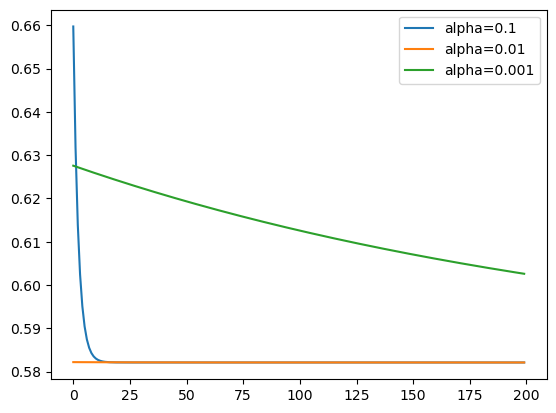

In [19]:
plt.figure()
plt.plot(alpha01['iter_num'],alpha01['cost'],label='alpha=0.1')
plt.legend()
plt.plot(alpha001['iter_num'],alpha001['cost'],label='alpha=0.01')
plt.legend()
plt.plot(alpha0001['iter_num'],alpha0001['cost'],label='alpha=0.001')
plt.legend()

# Version with 3 columns (metascore, reviews from critics, duration):

In [20]:
df2 = df[['avg_vote','metascore','reviews_from_critics','duration']]
df2 = df2.dropna()
df2

,avg_vote,metascore,reviews_from_critics,duration
46,7.8,99.0,77.0,163
309,6.5,66.0,63.0,88
348,8.1,90.0,65.0,72
400,7.0,69.0,43.0,96
458,7.1,89.0,25.0,92
...,...,...,...,...
47426,5.2,44.0,13.0,104
47427,5.7,68.0,37.0,97
47439,5.8,68.0,5.0,113
47441,6.1,72.0,94.0,92


In [21]:
X = df2[['metascore','reviews_from_critics','duration']]
y = df2['avg_vote']

In [22]:
X = np.array((X-X.mean())/X.std())
X

array([[ 2.52000202, -0.26133608,  2.90200561],
       [ 0.66077124, -0.38827079, -0.81177297],
       [ 2.01293908, -0.37013726, -1.60404574],
       ...,
       [ 0.77345189, -0.91414317,  0.42615322],
       [ 0.9988132 , -0.10720107, -0.61370478],
       [-1.0857789 , -0.37920403, -0.81177297]])

In [23]:
y = np.array((y-y.mean())/y.std())
y

array([ 1.56661842,  0.23770948,  1.87328972, ..., -0.47785687,
       -0.17118558, -1.19342323])

## Same steps

In [24]:
def initialize(x):
    b=random()
    theta=np.random.rand(x)
    return b,theta
b,theta=initialize(3) ### this changes depending dimensions
print('Bias:',b,'Weights:',theta)

Bias: 0.1332893189011074 Weights: [0.98392179 0.68804103 0.75541758]


In [25]:
def preds(b,theta,X):
    return b + np.dot(X,theta)

pred = preds(b,theta,X)
pred

array([ 4.62519032, -0.09693727,  0.64746998, ...,  0.58726111,
        0.57868127, -1.8091677 ])

In [26]:
def cost_f(y,pred):
    yres=y-pred
    return np.sum(np.dot(yres.T,yres))/len(y-yres)
cost_f(y,pred)

1.6343276515074396

In [27]:
def update_weights(x,y,pred,b_0,a_o,learning_rate):
    db=(np.sum(pred-y)*2)/len(y)
    dw=(np.dot((pred-y),x)*2)/len(y)
    b_1=b_0-learning_rate*db
    a_1=a_o-learning_rate*dw
    return b_1,a_1
print("After initialization -Bias: ",b,"Weights: ",theta)
pred=preds(b,theta,X)
b,theta=update_weights(X,y,pred,b,theta,0.01)
print("After first update -Bias: ",b,"Weights: ",theta)
cost_f(y,pred)

After initialization -Bias:  0.1332893189011074 Weights:  [0.98392179 0.68804103 0.75541758]
After first update -Bias:  0.13062353252308556 Weights:  [0.9709751  0.67182564 0.73962327]


1.6343276515074396

# Final

In [28]:
def gradient_descent(X,y,alpha,num_iterations):
    b,a=initialize(X.shape[1])
    iter_num=0
    d = []
    result_idx=0
    for each_iter in range(num_iterations):
        pred = preds(b,theta,X)
        this_cost=cost_f(y,pred)
        prev_b=b
        prev_theta=theta
        b,a=update_weights(X,y,pred,b,theta,alpha)
        d.append({
            'iter_num': iter_num,
            'cost': this_cost})
        result_idx=result_idx+1
        iter_num +=1
        print('Final Estimate of b and theta : ',b,theta)
    return b,theta,d

In [39]:
# b,theta,d = gradient_descent(X,y,alpha=0.1,num_iterations=200)

In [30]:
alpha01 = pd.DataFrame(d)
alpha01

,iter_num,cost
0,0,1.812343
1,1,1.717746
2,2,1.657204
3,3,1.618457
4,4,1.593659
...,...,...
195,195,1.549573
196,196,1.549573
197,197,1.549573
198,198,1.549573


In [40]:
# b,theta,d = gradient_descent(X,y,alpha=0.01,num_iterations=200)

In [32]:
alpha001 = pd.DataFrame(d)
alpha001

,iter_num,cost
0,0,1.599893
1,1,1.597900
2,2,1.595986
3,3,1.594148
4,4,1.592383
...,...,...
195,195,1.549593
196,196,1.549592
197,197,1.549591
198,198,1.549590


In [41]:
# b,theta,d = gradient_descent(X,y,alpha=0.001,num_iterations=200)

In [34]:
alpha0001 = pd.DataFrame(d)
alpha0001

,iter_num,cost
0,0,2.232402
1,1,2.229674
2,2,2.226956
3,3,2.224249
4,4,2.221553
...,...,...
195,195,1.862342
196,196,1.861092
197,197,1.859847
198,198,1.858607


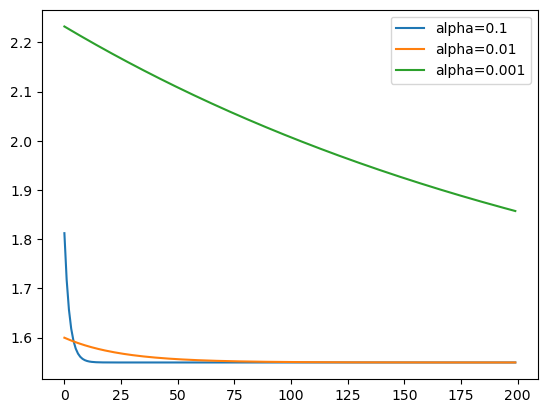

In [35]:
plt.figure()
plt.plot(alpha01['iter_num'],alpha01['cost'],label='alpha=0.1')
plt.legend()
plt.plot(alpha001['iter_num'],alpha001['cost'],label='alpha=0.01')
plt.legend()
plt.plot(alpha0001['iter_num'],alpha0001['cost'],label='alpha=0.001')
plt.legend()